## question 1:

Get the time series

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
def get_data(token):
    res_1 = requests.get(
            f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    res_2 = requests.get(
            f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    try:
        df = pd.DataFrame(
            res_1.json()['result']['3600'],
            columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
        )
    except:
        df = pd.DataFrame(
            res_2.json()['result']['3600'],
            columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
        )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df


In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
df_base = pd.concat(get_data(token) for token in tokens)
df_base

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
613,2021-12-17 13:00:00,8.418,8.455,8.393,8.400,13908.242230,1.172661e+05,FLOW
614,2021-12-17 14:00:00,8.393,8.489,8.393,8.487,4988.722975,4.210277e+04,FLOW
615,2021-12-17 15:00:00,8.507,8.520,8.207,8.271,56019.685228,4.640941e+05,FLOW
616,2021-12-17 16:00:00,8.235,8.395,8.199,8.390,19605.356532,1.627297e+05,FLOW


In [5]:
df = df_base.set_index('ts')
df

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...
2021-12-17 13:00:00,8.418,8.455,8.393,8.400,13908.242230,1.172661e+05,FLOW
2021-12-17 14:00:00,8.393,8.489,8.393,8.487,4988.722975,4.210277e+04,FLOW
2021-12-17 15:00:00,8.507,8.520,8.207,8.271,56019.685228,4.640941e+05,FLOW


## question 2:

Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [19]:
df.groupby(df.token)['volumeUSD'].sum().sort_values(ascending=False)

token
ETH     2.400961e+10
SOL     7.881919e+09
AVAX    4.138612e+09
USDT    2.174437e+09
FLOW    9.460669e+07
Name: volumeUSD, dtype: float64

## question 3:

calculates the close price ratio between ETH and SOL

In [21]:
df['close price ratio'] =  df['close'][df.token=='ETH'] / df['close'][df.token=='SOL']
df

,open,high,low,close,volume,volumeUSD,token,close price ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-17 13:00:00,8.418,8.455,8.393,8.400,13908.242230,1.172661e+05,FLOW,21.893661
2021-12-17 14:00:00,8.393,8.489,8.393,8.487,4988.722975,4.210277e+04,FLOW,22.124826
2021-12-17 15:00:00,8.507,8.520,8.207,8.271,56019.685228,4.640941e+05,FLOW,21.907327


## question 4:

Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

In [22]:
df.rename(columns = {'volume':'volumeBase', 'volumeUSD':'volumeTerm'}, inplace = True)
df

,open,high,low,close,volumeBase,volumeTerm,token,close price ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-17 13:00:00,8.418,8.455,8.393,8.400,13908.242230,1.172661e+05,FLOW,21.893661
2021-12-17 14:00:00,8.393,8.489,8.393,8.487,4988.722975,4.210277e+04,FLOW,22.124826
2021-12-17 15:00:00,8.507,8.520,8.207,8.271,56019.685228,4.640941e+05,FLOW,21.907327


## question5:

create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [23]:
df_5 = pd.concat((df['close'][df.token==token].rename(f'{token}') for token in tokens), axis=1)
df_5

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-17 13:00:00,3823.29,174.630,107.10,1.0003,8.400
2021-12-17 14:00:00,3817.86,172.560,105.33,1.0003,8.487
2021-12-17 15:00:00,3737.39,170.600,103.29,1.0001,8.271


## question6: 

calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [24]:
df_6 = np.log(df_5/df_5.shift(1)).dropna()
df_6

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
2021-11-22 05:00:00,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
2021-12-17 13:00:00,-0.003175,-0.007815,0.021041,0.0000,-0.001190
2021-12-17 14:00:00,-0.001421,-0.011924,-0.016665,0.0000,0.010304
2021-12-17 15:00:00,-0.021303,-0.011423,-0.019558,-0.0002,-0.025780


## question 7:

[Stretch] calculate the correlation of the tokens using the table above

In [25]:
df_7 = df_6.corr()
df_7

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.751647,0.648203,-0.097449,0.581087
SOL,0.751647,1.000000,0.639549,0.106066,0.470953
AVAX,0.648203,0.639549,1.000000,0.007058,0.398176
USDT,-0.097449,0.106066,0.007058,1.000000,-0.180911
FLOW,0.581087,0.470953,0.398176,-0.180911,1.000000


## question 8:

[Stretch] visualize the correlation in a matplpotlib plot

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

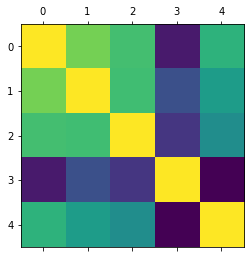

In [28]:
plt.matshow(df_7)